# Задание
Мы владеем сетью магазинов, в которых продаются различные товары. Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине. Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж.

In [186]:
import pandas as pd
import numpy as np
from termcolor import colored

In [187]:
#загружаю датасет
data = pd.read_csv('data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [188]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [190]:
data.iloc[1450]

Item_Identifier                              FDZ20
Item_Weight                                    NaN
Item_Fat_Content                           Low Fat
Item_Visibility                                  0
Item_Type                    Fruits and Vegetables
Item_MRP                                   253.036
Outlet_Identifier                           OUT027
Outlet_Establishment_Year                     1985
Outlet_Size                                 Medium
Outlet_Location_Type                        Tier 3
Outlet_Type                      Supermarket Type3
Item_Outlet_Sales                          11445.1
Name: 1450, dtype: object

In [191]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [192]:
for i in data.select_dtypes(include = ['object']):
    print (i, ':', data[i].unique(),':', len(list(data[i].unique())), '\n')

Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] : 1559 

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] : 5 

Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] : 16 

Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] : 10 

Outlet_Size : ['Medium' nan 'High' 'Small'] : 4 

Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2'] : 3 

Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] : 4 



Item_Fat_Content:
Очевидно, что 'Low Fat' = 'low fat' = 'LF', а 'Regular' = 'reg'.

Outlet_Size:
есть пропуски, которые можно легко заполнить.

In [193]:
data.loc[data['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [194]:
data.loc[data['Outlet_Size'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [195]:
data.loc[data['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [196]:
data.loc[data['Outlet_Size'].isnull()]['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [197]:
#Группирую 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type' что бы узнать, где и какие магазины расположены
#для заполнения пропусков
data.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).agg('sum').index

MultiIndex([(    'Grocery Store', 'Tier 1',  'Small'),
            ('Supermarket Type1', 'Tier 1', 'Medium'),
            ('Supermarket Type1', 'Tier 1',  'Small'),
            ('Supermarket Type1', 'Tier 2',  'Small'),
            ('Supermarket Type1', 'Tier 3',   'High'),
            ('Supermarket Type2', 'Tier 3', 'Medium'),
            ('Supermarket Type3', 'Tier 3', 'Medium')],
           names=['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'])

In [198]:
data.loc[(data['Outlet_Type'] == 'Grocery Store') ,['Outlet_Size']].head()

,Outlet_Size
3,NaN
23,Small
28,NaN
29,Small
30,NaN


In [199]:
data.loc[((data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 2')), ['Outlet_Size']].head()

,Outlet_Size
8,NaN
9,NaN
19,Small
22,Small
25,NaN


In [200]:
data.loc[((data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 3')), ['Outlet_Size']].head()

,Outlet_Size
4,High
6,High
14,High
20,High
27,High


Видно, что:
* 'Grocery Store' = 'Small'
* 'Supermarket Type1' ('Tier 2') = 'Small'
* 'Supermarket Type1' ('Tier 3') = 'High' (не смотря на то, что пропуски отсусвуют, проще и быстрее, я считаю, будет просто заменить все значения на 'High', чем искать пропуски)

Подозрение вызывает MAX ('Item_Outlet_Sales', 'Item_Weigh't и 'Item_MRP'), а так же
'Item_Visibility', так как MIN = 0, если товар не выставлен, то и не продаётся, но цена продажи есть.

In [201]:
data.loc[data['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [202]:
# процент строк с пропущенными данными
(1463+2410+526)*100/len(data)

51.61328170831867

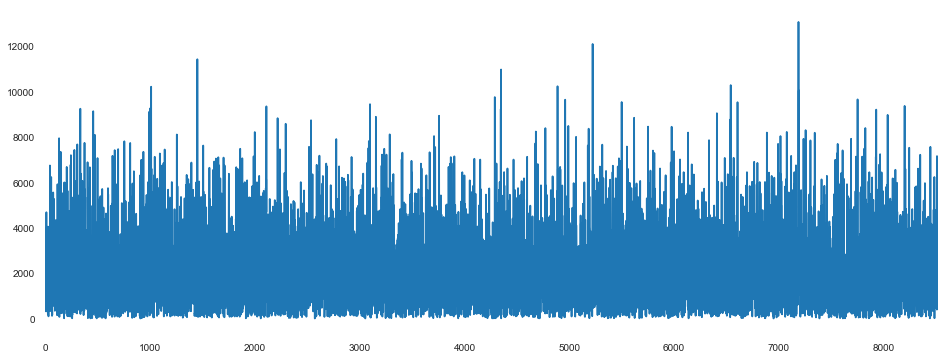

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16, 6))
data['Item_Outlet_Sales'].plot()
plt.show()

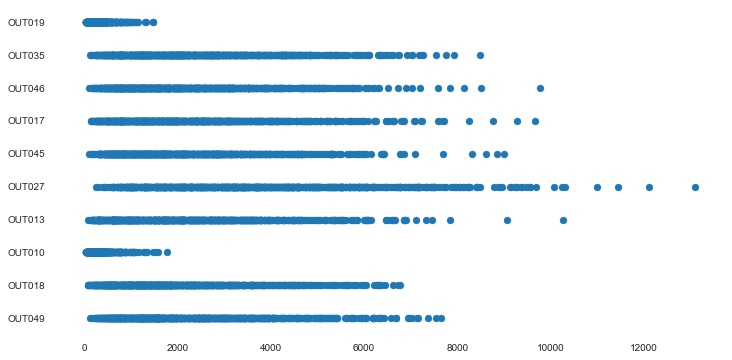

In [204]:
y = data['Outlet_Identifier']
x = data['Item_Outlet_Sales']
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.show()

Похоже на выбросы в:
* out035 - 1 выброс
* out046 - 5 выброса
* out017 - 4 выброса
* out027 - 4 выброса
* out013 - 3 выброса

#### Проверка выбросов

In [205]:
"""""
Удобнее проверять используюя функцию
Вход: 
    df - датафрейм составленный по Outlet_Type и Item_Outlet_Sales, содержит выбросы;
    n - потенциальное количество выбросов.

Выход. Печатает информацию о выбросе:
    Item_Identifier;
    Тип магазина;
    Стоимость продажи;
    Разница между стоимостью продажи товара-выброса и ближайшим товаром;
    Стандартное оклонение стоимости продажи товара-выброса в типt магазина без учёта выброса
"""""

def stats (df, n):
    if n  < 1 or n >10:
        return print (colored('ERROR! ''n'' - out of range', 'red'))
    
    item = list(df['Item_Identifier'].iloc[:n]) #товары (item) выбросов
    items_dict = dict.fromkeys(item)

    for it in item:
        it_outlet = df.loc[(df['Item_Identifier'] == it), ['Outlet_Type']].values #магазин 
        it_sale = it_sale = df.loc[(df['Item_Identifier'] == it), ['Item_Outlet_Sales']].values #стоимость продажи
        try: #обработчик исклчений добавил, поскольку попадаются неимеющие ближайшей стоимости продажи выбросы
            near_it_sale = near_it_sale = df['Item_Outlet_Sales'].iloc[n].item() #ближайшее значени стоимости продажи
        except IndexError:
            near_it_sale = -1
        std = data.loc[(data['Item_Identifier'] == it) &
                        (data['Outlet_Type'] == it_outlet.item()) &
                        (data['Item_Outlet_Sales'] != it_sale.item()), ['Item_Outlet_Sales']].std() # стандартное отклонение
                  
        print(it)
        print('Тип магазина:', it_outlet.item())
        print ('Стоимость продажи:', it_sale.item())
        if near_it_sale == -1:
            print (colored('Ближайшая стоимость не обнаружена!', 'red'))
        else:
            print('Разница между стоимостью продажи товара-выброса и ближайшим товаром:', it_sale.item() - near_it_sale) 
        print('Стандартное оклонение стоимости продажи', it, 'в магазинах типа', it_outlet.item(), 'без учёта выброса:', round(std.item(), 4), '\n')

##### OUT035 - 1 выброс

In [206]:
out035 = data.loc[data['Outlet_Identifier'] == 'OUT035'].sort_values(by = ['Item_Outlet_Sales'], ascending = False)
out035.iloc[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5752,FDI15,13.800,Low Fat,0.141326,Dairy,265.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,8479.6288
2776,FDB37,20.250,Regular,0.022936,Baking Goods,240.8538,OUT035,2004,Small,Tier 2,Supermarket Type1,7931.6754
373,FDX09,9.000,Low Fat,0.065237,Snack Foods,176.4370,OUT035,2004,Small,Tier 2,Supermarket Type1,7763.2280
3083,FDJ15,11.350,Regular,0.023318,Dairy,182.4608,OUT035,2004,Small,Tier 2,Supermarket Type1,7534.1928
7967,FDR16,5.845,Regular,0.104998,Frozen Foods,213.2218,OUT035,2004,Small,Tier 2,Supermarket Type1,7266.5412


In [207]:
stats (out035, 1)

FDI15
Тип магазина: Supermarket Type1
Стоимость продажи: 8479.6288
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 547.9534000000003
Стандартное оклонение стоимости продажи FDI15 в магазинах типа Supermarket Type1 без учёта выброса: 1351.181 



##### OUT046 - 5 выбросов

In [208]:
out046 = data.loc[data['Outlet_Identifier'] == 'OUT046'].sort_values(by = ['Item_Outlet_Sales'], ascending = False)
out046.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
4991,NCQ53,17.600,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
1254,FDG47,12.800,Low Fat,0.069619,Starchy Foods,260.3252,OUT046,1997,Small,Tier 1,Supermarket Type1,8132.0812
753,FDY26,20.600,reg,0.030511,Dairy,211.4244,OUT046,1997,Small,Tier 1,Supermarket Type1,7833.8028
2516,FDJ38,8.600,Regular,0.040206,Canned,188.7530,OUT046,1997,Small,Tier 1,Supermarket Type1,7590.1200
7118,NCV53,8.270,Low Fat,0.018814,Health and Hygiene,237.9880,OUT046,1997,Small,Tier 1,Supermarket Type1,7190.6400
4468,FDC02,21.350,Low Fat,0.068822,Canned,258.3278,OUT046,1997,Small,Tier 1,Supermarket Type1,7028.8506
3073,FDD17,7.500,LF,0.032627,Frozen Foods,235.9906,OUT046,1997,Small,Tier 1,Supermarket Type1,6893.0274
5292,FDO11,8.000,Regular,0.030265,Breads,250.3092,OUT046,1997,Small,Tier 1,Supermarket Type1,6723.2484
2528,FDI57,19.850,Low Fat,0.054026,Seafood,197.2768,OUT046,1997,Small,Tier 1,Supermarket Type1,6503.5344


In [209]:
stats(out046, 5)

NCM05
Тип магазина: Supermarket Type1
Стоимость продажи: 9779.9362
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 2589.2961999999998
Стандартное оклонение стоимости продажи NCM05 в магазинах типа Supermarket Type1 без учёта выброса: 186.9043 

NCQ53
Тип магазина: Supermarket Type1
Стоимость продажи: 8508.924
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1318.2840000000006
Стандартное оклонение стоимости продажи NCQ53 в магазинах типа Supermarket Type1 без учёта выброса: 1371.4254 

FDG47
Тип магазина: Supermarket Type1
Стоимость продажи: 8132.0812
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 941.4411999999993
Стандартное оклонение стоимости продажи FDG47 в магазинах типа Supermarket Type1 без учёта выброса: 1211.6282 

FDY26
Тип магазина: Supermarket Type1
Стоимость продажи: 7833.8028
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 643.1628000000001
Стандартное оклонение стоимости продажи FDY26 в 

##### OUT017 - 4 выброса

In [210]:
out017 = data.loc[data['Outlet_Identifier'] == 'OUT017'].sort_values(by = ['Item_Outlet_Sales'], ascending = False)
out017.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4961,FDK03,12.600,Regular,0.074339,Dairy,255.5356,OUT017,2007,NaN,Tier 2,Supermarket Type1,9664.7528
997,FDK28,5.695,Low Fat,0.065961,Frozen Foods,259.2646,OUT017,2007,NaN,Tier 2,Supermarket Type1,9275.9256
2535,FDD44,8.050,Regular,0.078844,Fruits and Vegetables,257.0646,OUT017,2007,NaN,Tier 2,Supermarket Type1,8760.5964
7076,FDR34,17.000,Regular,0.016056,Snack Foods,228.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,8245.2672
6993,FDT21,7.420,Low Fat,0.020507,Snack Foods,249.7092,OUT017,2007,NaN,Tier 2,Supermarket Type1,7719.2852


In [211]:
stats (out017, 4)

FDK03
Тип магазина: Supermarket Type1
Стоимость продажи: 9664.7528
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1945.4676
Стандартное оклонение стоимости продажи FDK03 в магазинах типа Supermarket Type1 без учёта выброса: 1027.8851 

FDK28
Тип магазина: Supermarket Type1
Стоимость продажи: 9275.9256
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1556.6404000000002
Стандартное оклонение стоимости продажи FDK28 в магазинах типа Supermarket Type1 без учёта выброса: nan 

FDD44
Тип магазина: Supermarket Type1
Стоимость продажи: 8760.5964
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1041.3112
Стандартное оклонение стоимости продажи FDD44 в магазинах типа Supermarket Type1 без учёта выброса: 740.0852 

FDR34
Тип магазина: Supermarket Type1
Стоимость продажи: 8245.2672
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 525.982
Стандартное оклонение стоимости продажи FDR34 в магазинах типа Supermarket Type1

##### OUT027 - 4 выброса

In [212]:
out027 = data.loc[data['Outlet_Identifier'] == 'OUT027'].sort_values(by = ['Item_Outlet_Sales'], ascending = False)
out027.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


In [213]:
stats (out027, 4)

NCE42
Тип магазина: Supermarket Type3
Стоимость продажи: 13086.9648
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 2780.380799999999
Стандартное оклонение стоимости продажи NCE42 в магазинах типа Supermarket Type3 без учёта выброса: nan 

FDQ19
Тип магазина: Supermarket Type3
Стоимость продажи: 12117.56
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1810.9759999999987
Стандартное оклонение стоимости продажи FDQ19 в магазинах типа Supermarket Type3 без учёта выброса: nan 

FDZ20
Тип магазина: Supermarket Type3
Стоимость продажи: 11445.101999999999
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1138.5179999999982
Стандартное оклонение стоимости продажи FDZ20 в магазинах типа Supermarket Type3 без учёта выброса: nan 

FDP33
Тип магазина: Supermarket Type3
Стоимость продажи: 10993.6896
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 687.105599999999
Стандартное оклонение стоимости продажи FDP33 в магазин

##### OUT013 - 3 выброса

In [214]:
out013 = data.loc[data['Outlet_Identifier'] == 'OUT013'].sort_values(by = ['Item_Outlet_Sales'], ascending = False)
out013.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
6409,FDA21,13.650,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
3087,DRK23,8.395,Low Fat,0.071917,Hard Drinks,254.8040,OUT013,1987,High,Tier 3,Supermarket Type1,7843.1240
276,FDY55,16.750,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652
7560,FDB56,8.750,Regular,0.074565,Fruits and Vegetables,186.8556,OUT013,1987,High,Tier 3,Supermarket Type1,7322.4684


In [215]:
stats (out013, 4)

FDF39
Тип магазина: Supermarket Type1
Стоимость продажи: 10256.649
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 2934.1805999999997
Стандартное оклонение стоимости продажи FDF39 в магазинах типа Supermarket Type1 без учёта выброса: 557.8882 

FDA21
Тип магазина: Supermarket Type1
Стоимость продажи: 9069.5276
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 1747.0591999999997
Стандартное оклонение стоимости продажи FDA21 в магазинах типа Supermarket Type1 без учёта выброса: 846.5153 

DRK23
Тип магазина: Supermarket Type1
Стоимость продажи: 7843.124
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 520.6556
Стандартное оклонение стоимости продажи DRK23 в магазинах типа Supermarket Type1 без учёта выброса: 1789.0084 

FDY55
Тип магазина: Supermarket Type1
Стоимость продажи: 7452.9652
Разница между стоимостью продажи товара-выброса и ближайшим товаром: 130.4967999999999
Стандартное оклонение стоимости продажи FDY55 в магазинах 

* out035: 
    FDI15 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.
        
    
* out046:
    - **NCM05 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**
    - NCQ53 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.
    - FDG47 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.
    - FDY26 - стандартное оклоненение прибыли для этого типа товаров рассчитать не удалось, вероятно, этот тип товара продаёт только в одном магазине. Удалять эту позицию рисковано - она может вытаскивать магазин. Оставляю как есть.
    - FDJ38 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.
    
    
* out017 - выбросы разспределены равномер, вероятно, это локальные максимумы покупок в этом магазине. Оставляю как есть.


* out027 - **все выбросы удаляю. Магазин продаёт большое количество товаров, я вижу большую вероятность ошибки при внесении этих данных в датасет, кроме того, из-за большого ассортимента исключение этих данных не должго сильно снизить прибыль магазина. Совокупная прибыль по остальным позициям значительно больше суммы 4 выбросов.**


* out013:
    - **FDF39 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**
    - **FDA21 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**
    - DRK23 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.
    - FDY55 - рассстояние между выбросом и ближайшей стоимостью меньше стандартного отклонения, вероятно, это не выброс а какой-то локальный максимум потребления. Оставляю как есть.

## Обрабатываю дасет

### Сокращаю "лишние" признаки

data['Item_Fat_Content'] содержит избыточное количество признаков

In [216]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [217]:
data.loc[data['Item_Fat_Content'] == 'Low Fat', 'Item_Fat_Content'] = 'low fat'
data.loc[data['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'low fat'
data.loc[data['Item_Fat_Content'] == 'Regular', 'Item_Fat_Content'] = 'regular'
data.loc[data['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'regular'
data['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

### Заполняю пропуски в 'Item_Weight '

In [218]:
null_items = data.loc[(data['Item_Weight'].isnull())]['Item_Identifier'].unique()
item_weidht = float() # промежуточная переменная
total_null = list()

for i in null_items:
        #могут быть такие Item_Identifier, для которых Item_Weight == Nane, для обхода ошибки делаю обработчик исключений
        try: 
            item_weidht = data.loc[(data['Item_Identifier'] == i) & (~data['Item_Weight'].isnull())]['Item_Weight'].iloc[0]
            data.loc[(data['Item_Identifier']== i), ['Item_Weight']] = item_weidht
        except LookupError:
            total_null.append(i)
print(total_null)
data.isnull().sum()

['FDN52', 'FDK57', 'FDE52', 'FDQ60']


Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Заполняю пропуски в 'Outlet_Size'

* 'Grocery Store' = 'Small'
* 'Supermarket Type1' ('Tier 2') = 'Small'
* 'Supermarket Type1' ('Tier 3') = 'High'

In [219]:
#'Grocery Store' = 'Small'
data.loc[(data['Outlet_Type'] == 'Grocery Store') ,['Outlet_Size']] = 'Small'

#'Supermarket Type1' ('Tier 2') = 'Small'
data.loc[((data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 2')), ['Outlet_Size']] = 'Small'

# 'Supermarket Type1' ('Tier 3') = 'High'
data.loc[((data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 3')), ['Outlet_Size']] = 'High'

data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Заполняю пропуски в Item_Visibility

Предпологаю, что товар в магазинах одного типа размещаются на одних и тех же полках, то есть можно заполнить пропуски среднем значением.

In [220]:
#перечень товаров с нулевым значением 'Item_Visibility'
item_vis_0 = data.loc[data['Item_Visibility'] == 0]['Item_Identifier'].unique()
print(item_vis_0[:10])
print('Количество товаров с пропусками в [Item_Visibility]:',len(item_vis_0))

['FDX07' 'NCD19' 'FDP36' 'FDY07' 'FDP33' 'FDO23' 'NCP05' 'FDM20' 'FDH35'
 'FDV25']
Количество товаров с пропусками в [Item_Visibility]: 446


In [221]:
#mean_vis = float() #переменная для хранения средненго значения видимости Item_Identifier для 'Outlet_Type'
#outlet_vis = str() #переменная для хранения типа магазина при data['Item_Visibility'] == 0
count_nan_mean = 0

for item in item_vis_0:
    #нахожу 'Outlet_Type'
    outlet_vis = data.loc[(data['Item_Visibility'] == 0) &
                          (data['Item_Identifier'] == item),
                          ['Outlet_Type']].iloc[0]
    #считаю среднее значение ['Item_Visibility']
    mean_vis = data.loc[(data['Item_Visibility'] != 0) &
                            (data['Item_Identifier'] == item) &
                            (data['Outlet_Type'] == outlet_vis[0]),
                            ['Item_Visibility']].mean()
    #проверяю, на среднее значение Item_Visibility не None - такое может быть,
    #если тройка Item_Identifier, и Outlet_Type уникальны
    if pd.isnull(mean_vis[0]) == False:
        count_nan_mean += 1
        data.loc[(data['Item_Visibility'] == 0) & 
                 (data['Item_Identifier'] == item) &
                 (data['Outlet_Type'] == outlet_vis[0]), 
                 ['Item_Visibility']] = mean_vis[0]

### Оценка влияния оставшихся пропусков.

Большенство пропусков исключено, однако остались ещё пропуски.
Необходимо оценить насколько критичным будет удаление оставшихся.

In [222]:
#стоимость товаров 'Item_Visibility' == 0, приходящейся на 1 магазин
items_0 = data.loc[(data['Item_Visibility'] == 0)].groupby(['Item_Type', 'Outlet_Type']).agg('sum')['Item_Outlet_Sales'].sum()/len(data['Outlet_Identifier'].unique())

#стоимость всех товаров в датасете приходящихся на 1 магазин
all_items = data['Item_Outlet_Sales'].sum()/len(data['Outlet_Identifier'].unique())

print('Оценка % убытков на 1 магазин, если товарами items_0 перенебречь')
print(round(items_0*100/all_items, 2), '%')

Оценка % убытков на 1 магазин, если товарами items_0 перенебречь
2.23 %


In [223]:
#Процент строк и пропусками 
data.loc[(data['Item_Visibility'] == 0), ['Item_Visibility']] = np.nan

IV_nan = data['Item_Visibility'].isnull().sum()
IW_nan = data['Item_Weight'].isnull().sum()

print('Процент строк и пропусками')
print(round(((IV_nan + IW_nan)*100)/len(data),2), '%')

Процент строк и пропусками
2.25 %


### Выбросы

* out046:
    - **NCM05 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**
 
* out027 - **все выбросы удаляю. Магазин продаёт большое количество товаров, я вижу большую вероятность ошибки при внесении этих данных в датасет, кроме того, из-за большого ассортимента исключение этих данных не должго сильно снизить прибыль магазина. Совокупная прибыль по остальным позициям значительно больше суммы 4 выбросов.**

* out013:
    - **FDF39 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**
    - **FDA21 - рассстояние между выбросом и ближайшей стоимостью больше стандартного отклонения, вероятно, это похоже на ошибку. Значение скорректиру на величину стандартного оклонения.**

In [224]:
# out046['Item_Identifier'] == NCM05
data['Item_Outlet_Sales'][out046.index[0]] -= 1351.181

#out027['Item_Identifier] == NCE42, FDQ19, FDZ20, FDP33
items027 = out027.iloc[:4].index
data.drop(items027, inplace = True)

#out013['Item_Identifier'] == FDF39, FDA21
data.loc[(data['Item_Identifier'] == 'FDF39') & (data['Outlet_Identifier'] == 'OUT013'), ['Item_Outlet_Sales']] -= 557.8882
data.loc[(data['Item_Identifier'] == 'FDA21') & (data['Outlet_Identifier'] == 'OUT013'), ['Item_Outlet_Sales']] -= 846.5153

### Удаляю данные

In [225]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8328 non-null object
Item_Weight                  8328 non-null float64
Item_Fat_Content             8328 non-null object
Item_Visibility              8328 non-null float64
Item_Type                    8328 non-null object
Item_MRP                     8328 non-null float64
Outlet_Identifier            8328 non-null object
Outlet_Establishment_Year    8328 non-null int64
Outlet_Size                  8328 non-null object
Outlet_Location_Type         8328 non-null object
Outlet_Type                  8328 non-null object
Item_Outlet_Sales            8328 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 845.8+ KB


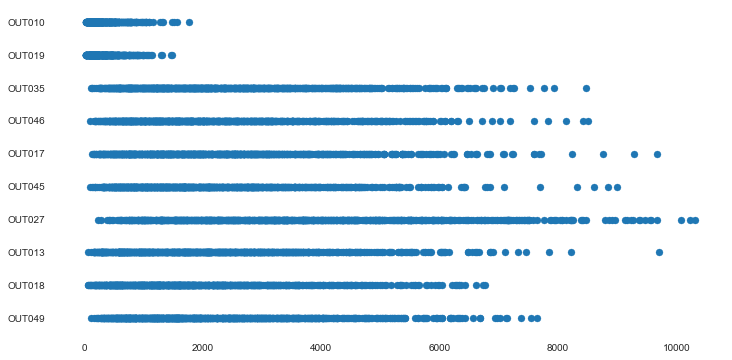

In [226]:
y = data['Outlet_Identifier']
x = data['Item_Outlet_Sales']
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.show()

### Создаю признаки

In [227]:
%%time
#Количество проданного типа товара
data['Item_Quantity'] = round(data['Item_Outlet_Sales'] / data['Item_MRP']).astype('int32')

#выручка за товар с процента полки
data['Visibility_Revenue'] = round(data['Item_Visibility'] * data['Item_Outlet_Sales'], 4)

#процент выручки за товар в общей выручке магазина
data['Revenue_Item'] = 0
outlet_list = list(data['Outlet_Identifier'].unique())
for oi in outlet_list:
    #прибыль магазина
    revenue = data.loc[data['Outlet_Identifier'] == oi, ['Item_Outlet_Sales']].sum()
    
    #товары, продаваемые в магазине
    items_outlet = pd.unique(data[data['Outlet_Identifier'] == oi]['Item_Identifier']).tolist()
    
    for item in items_outlet:
        #прибыль с item
        item_revenue = data.loc[(data['Outlet_Identifier'] == oi) & (data['Item_Identifier'] == item), ['Item_Outlet_Sales']]
        #считаю % прибыли товара в общей прибыли магазна
        data.loc[(data['Outlet_Identifier'] == oi) & (data['Item_Identifier'] == item), ['Revenue_Item']] = (item_revenue.values * 100) / revenue.item() 

data.head()

Wall time: 50.9 s


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Quantity,Visibility_Revenue,Revenue_Item
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15,59.9389,0.171245
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,8.5484,0.025777
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15,35.1504,0.096154
4,NCD19,8.93,low fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18,13.1467,0.046662
6,FDO10,13.65,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,6,4.3772,0.016116


In [228]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8328.0,12.883432,4.643570,4.555000,8.840000,12.650000,16.850000,21.350000
Item_Visibility,8328.0,0.070522,0.050297,0.003575,0.031381,0.057831,0.098291,0.328391
Item_MRP,8328.0,141.106481,62.138046,31.290000,94.143600,143.215400,185.624650,266.888400
Outlet_Establishment_Year,8328.0,1997.880043,8.299292,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8328.0,2176.771320,1685.844255,33.290000,838.908000,1797.660000,3095.970000,10306.584000
Item_Quantity,8328.0,15.390970,9.094707,1.000000,9.000000,15.000000,21.000000,57.000000
Visibility_Revenue,8328.0,142.143680,156.704799,0.859300,36.997725,87.952550,187.482850,1674.758300
Revenue_Item,8328.0,0.120077,0.088604,0.003436,0.058226,0.099738,0.157749,0.976269


### Сохраняю обработанный датасет в .csv

In [229]:
data.to_csv('ready_data.csv', index = False)

## Прогнозирование

In [230]:
df = pd.read_csv('ready_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Quantity,Visibility_Revenue,Revenue_Item
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15,59.9389,0.171245
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,8.5484,0.025777
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15,35.1504,0.096154
3,NCD19,8.93,low fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18,13.1467,0.046662
4,FDO10,13.65,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,6,4.3772,0.016116


In [231]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, html={'style':{'full_width':True}})
profile.to_widgets()